<a href="https://colab.research.google.com/github/farhadrgh/machine-learning/blob/master/Manifold_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

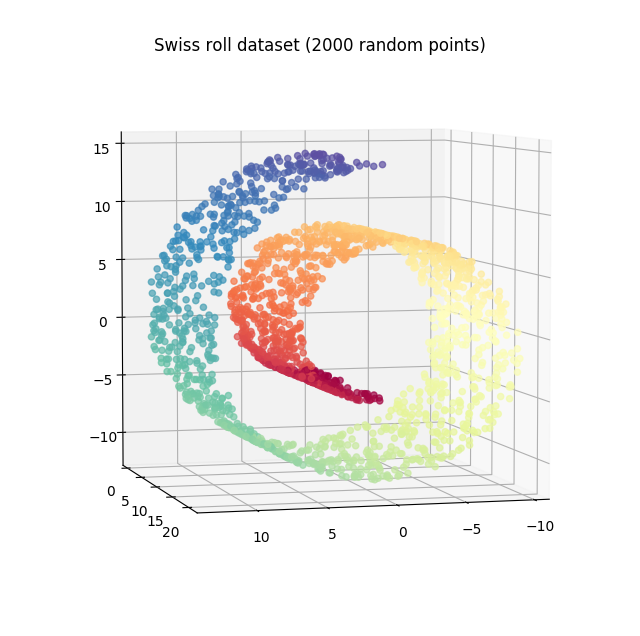

In [214]:
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, manifold
Axes3D
plt.style.use('default')

n_samples=2000
X, color = datasets.samples_generator.make_swiss_roll(n_samples=n_samples)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, alpha=0.7)
ax.view_init(5, 75)
ax.set_title(f'Swiss roll dataset ({n_samples} random points)')
plt.show()

In [0]:
def plt_embeded(X_r, color, method, K, gamma):

  fig = plt.figure(figsize=(4,4))
  ax = fig.add_subplot(111)
  ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
  plt.axis('tight')
  plt.xticks([]), plt.yticks([])
  if method[-5:] == "(rbf)":
    plt.title(f'{method} with $\sigma$={1/sqrt(gamma):.2f}')
  elif method[-5:] == "(kNN)":
    plt.title(f'{method} with K={K}')
  else:
    plt.title(f'{method} with K={K}')
  plt.show()

In [0]:
def LLE_roll(X, K):
  """Locally linear embedding of the swiss roll"""
  
  lle = manifold.LocallyLinearEmbedding(n_neighbors=K, n_components=2)
  X_r = lle.fit_transform(X)
                          
  return X_r

Radial Basis Function (RBF) or "Gaussian" Kernel:


$ k(x, y) = \exp( -\gamma \| x-y \|^2) $

In [0]:
def Spec_roll(X, K, gamma, kernel):
  """Spectral embedding of the swiss roll"""

  se = manifold.SpectralEmbedding(n_components=2, n_neighbors=K, affinity=kernel, gamma=gamma)
  X_r = se.fit_transform(X)
  
  return X_r

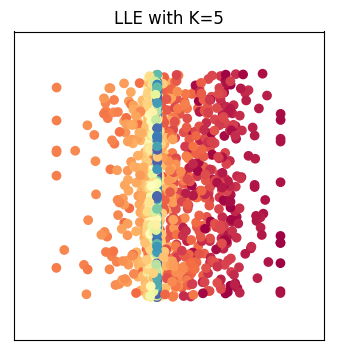

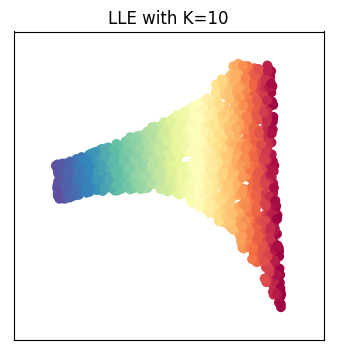

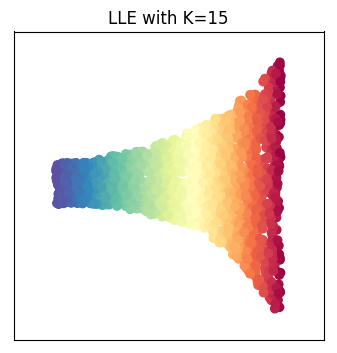

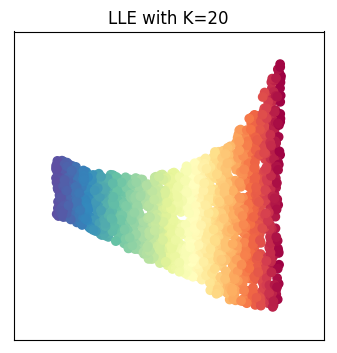

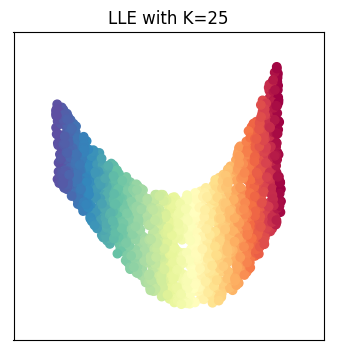

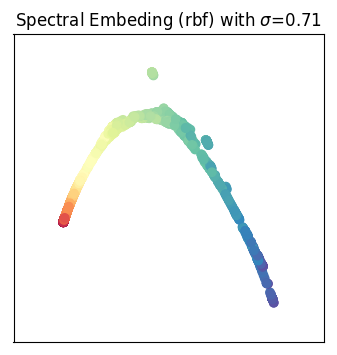

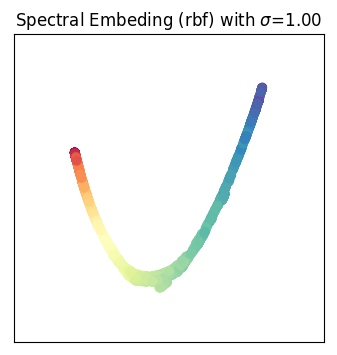

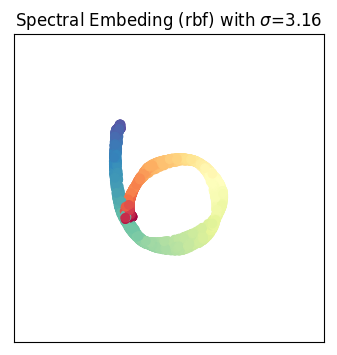

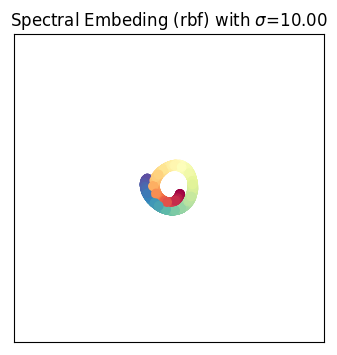

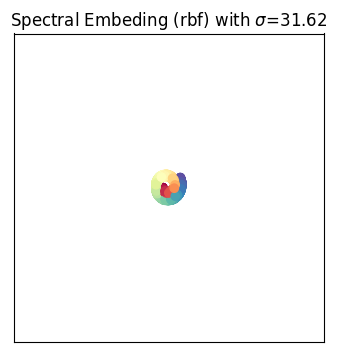

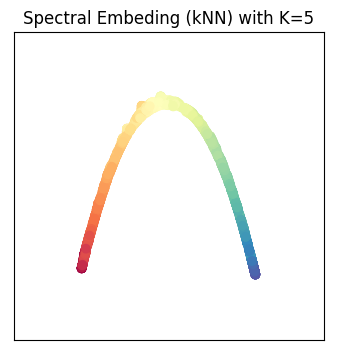

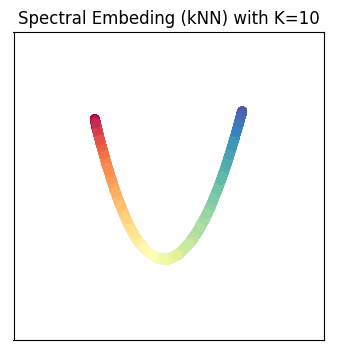

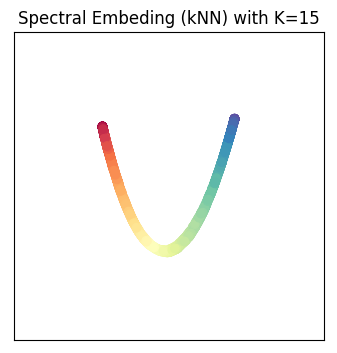

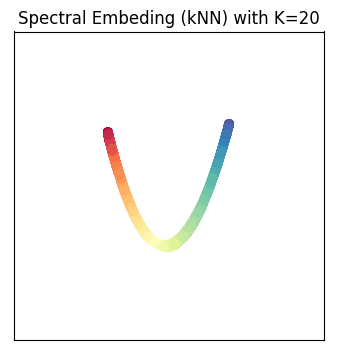

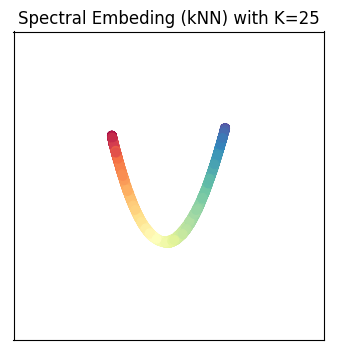

In [218]:
import itertools

K_vals = [5, 10, 15, 20, 25]
gamma_vals = [2, 1, 0.1, 0.01, 0.001]

# LLE
for K in K_vals:
  X_r = LLE_roll(X, K)
  plt_embeded(X_r, color, "LLE", K, 0)

  
# rbf spectral embeding  
kernel = 'rbf'
for gamma in gamma_vals:
  X_r = Spec_roll(X, None, gamma, kernel)
  plt_embeded(X_r, color, "Spectral Embeding (rbf)", K, gamma)
  
  
# nearest neighbor spectral embeding
kernel = 'nearest_neighbors'
for K in K_vals:
  X_r = Spec_roll(X, K, None, kernel)  
  plt_embeded(X_r, color, "Spectral Embeding (kNN)", K, gamma)